In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
dummy_df = df.copy()

In [5]:
dummy_df.drop(columns=['contact', 'poutcome', 'day', 'month', 'pdays'], inplace=True)
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,0,yes


In [6]:
# Will decision tree work without encoding?

In [7]:
def preprocessor(df):
    ref_df = df.copy()
    le=LabelEncoder()
    ref_df['job']=le.fit_transform(ref_df['job'])
    ref_df['marital']=le.fit_transform(ref_df['marital'])
    ref_df['education']=le.fit_transform(ref_df['education'])
    ref_df['default']=le.fit_transform(ref_df['default'])
    ref_df['housing']=le.fit_transform(ref_df['housing'])
    ref_df['loan']=le.fit_transform(ref_df['loan'])
    ref_df['deposit']=le.fit_transform(ref_df['deposit'])
    return ref_df

In [8]:
encoded_df = preprocessor(dummy_df) 

In [9]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,deposit
0,59,0,1,1,0,2343,1,0,1042,1,0,1
1,56,0,1,1,0,45,0,0,1467,1,0,1
2,41,9,1,1,0,1270,1,0,1389,1,0,1
3,55,7,1,1,0,2476,1,0,579,1,0,1
4,54,0,1,2,0,184,0,0,673,2,0,1


In [10]:
x = encoded_df.drop(['deposit'], axis=1)
y = encoded_df[['deposit']]

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [12]:
xtrain.shape

(8929, 11)

In [13]:
# Model1 Depth=2
model1 = DecisionTreeClassifier(random_state=1, max_depth=2)
model1.fit(xtrain, ytrain)
model1_score_train = model1.score(xtrain, ytrain)
print('Training Score', model1_score_train)

model1_score_test = model1.score(xtest, ytest)
print('Test Score: ', model1_score_test)

Training Score 0.7130697726509128
Test Score:  0.7012987012987013


In [14]:
# Model2 Depth=4
model2 = DecisionTreeClassifier(random_state=1, max_depth=4)
model2.fit(xtrain, ytrain)
model2_score_train = model2.score(xtrain, ytrain)
print('Training Score', model2_score_train)

model2_score_test = model2.score(xtest, ytest)
print('Test Score: ', model2_score_test)

Training Score 0.7840743644305074
Test Score:  0.7702642185400806


In [15]:
# Model3 Depth= not defined
model3 = DecisionTreeClassifier(random_state=1)
model3.fit(xtrain, ytrain)
model3_score_train = model3.score(xtrain, ytrain)
print('Training Score', model3_score_train)

model3_score_test = model3.score(xtest, ytest)
print('Test Score: ', model3_score_test)
# overfitting

Training Score 1.0
Test Score:  0.7313031795790417


In [16]:
from sklearn.metrics import classification_report
ypred = model2.predict(xtest)

In [17]:
ytest.value_counts()

deposit
0          1187
1          1046
Name: count, dtype: int64

In [18]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1187
           1       0.72      0.83      0.77      1046

    accuracy                           0.77      2233
   macro avg       0.78      0.77      0.77      2233
weighted avg       0.78      0.77      0.77      2233



In [19]:
# Printing the tree

[Text(0.5, 0.8333333333333334, 'duration <= 205.5\ngini = 0.499\nsamples = 8929\nvalue = [4686, 4243]\nclass = 0'),
 Text(0.25, 0.5, 'duration <= 130.5\ngini = 0.328\nsamples = 3624\nvalue = [2874, 750]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'gini = 0.187\nsamples = 2078\nvalue = [1861, 217]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.452\nsamples = 1546\nvalue = [1013.0, 533.0]\nclass = 0'),
 Text(0.75, 0.5, 'duration <= 441.5\ngini = 0.45\nsamples = 5305\nvalue = [1812, 3493]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 2783\nvalue = [1333.0, 1450.0]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.308\nsamples = 2522\nvalue = [479, 2043]\nclass = 1')]

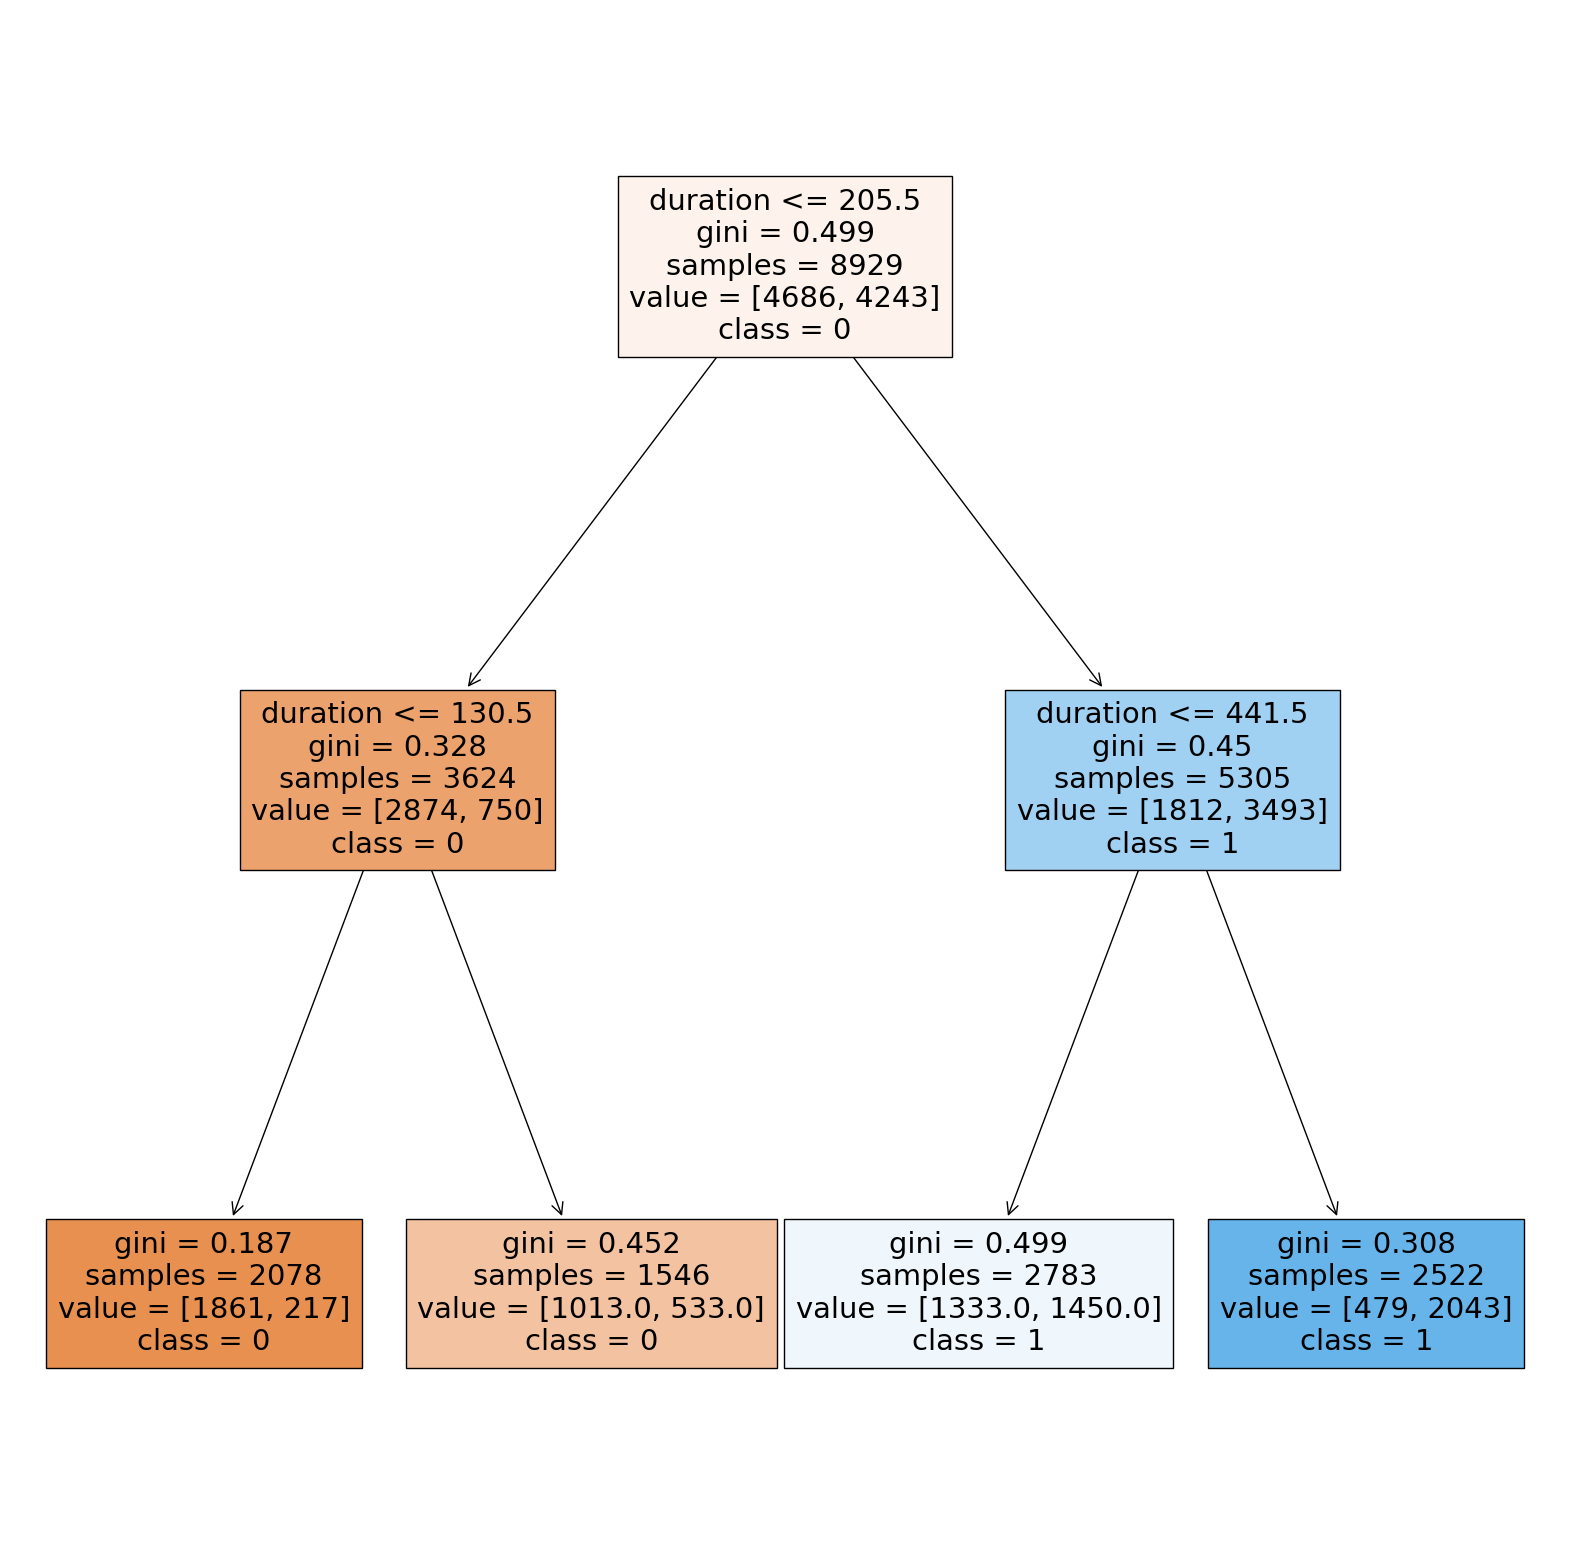

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(model1, filled=True, feature_names=xtrain.columns, class_names=['0','1'])

[Text(0.5, 0.9, 'duration <= 205.5\ngini = 0.499\nsamples = 8929\nvalue = [4686, 4243]\nclass = 0'),
 Text(0.25, 0.7, 'duration <= 130.5\ngini = 0.328\nsamples = 3624\nvalue = [2874, 750]\nclass = 0'),
 Text(0.125, 0.5, 'duration <= 77.5\ngini = 0.187\nsamples = 2078\nvalue = [1861, 217]\nclass = 0'),
 Text(0.0625, 0.3, 'previous <= 0.5\ngini = 0.05\nsamples = 930\nvalue = [906, 24]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.033\nsamples = 784\nvalue = [771, 13]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.139\nsamples = 146\nvalue = [135, 11]\nclass = 0'),
 Text(0.1875, 0.3, 'housing <= 0.5\ngini = 0.28\nsamples = 1148\nvalue = [955, 193]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.378\nsamples = 578\nvalue = [432, 146]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.151\nsamples = 570\nvalue = [523.0, 47.0]\nclass = 0'),
 Text(0.375, 0.5, 'previous <= 0.5\ngini = 0.452\nsamples = 1546\nvalue = [1013.0, 533.0]\nclass = 0'),
 Text(0.3125, 0.3, 'housing <= 0.5\ngini = 0.368\nsamples = 1149\

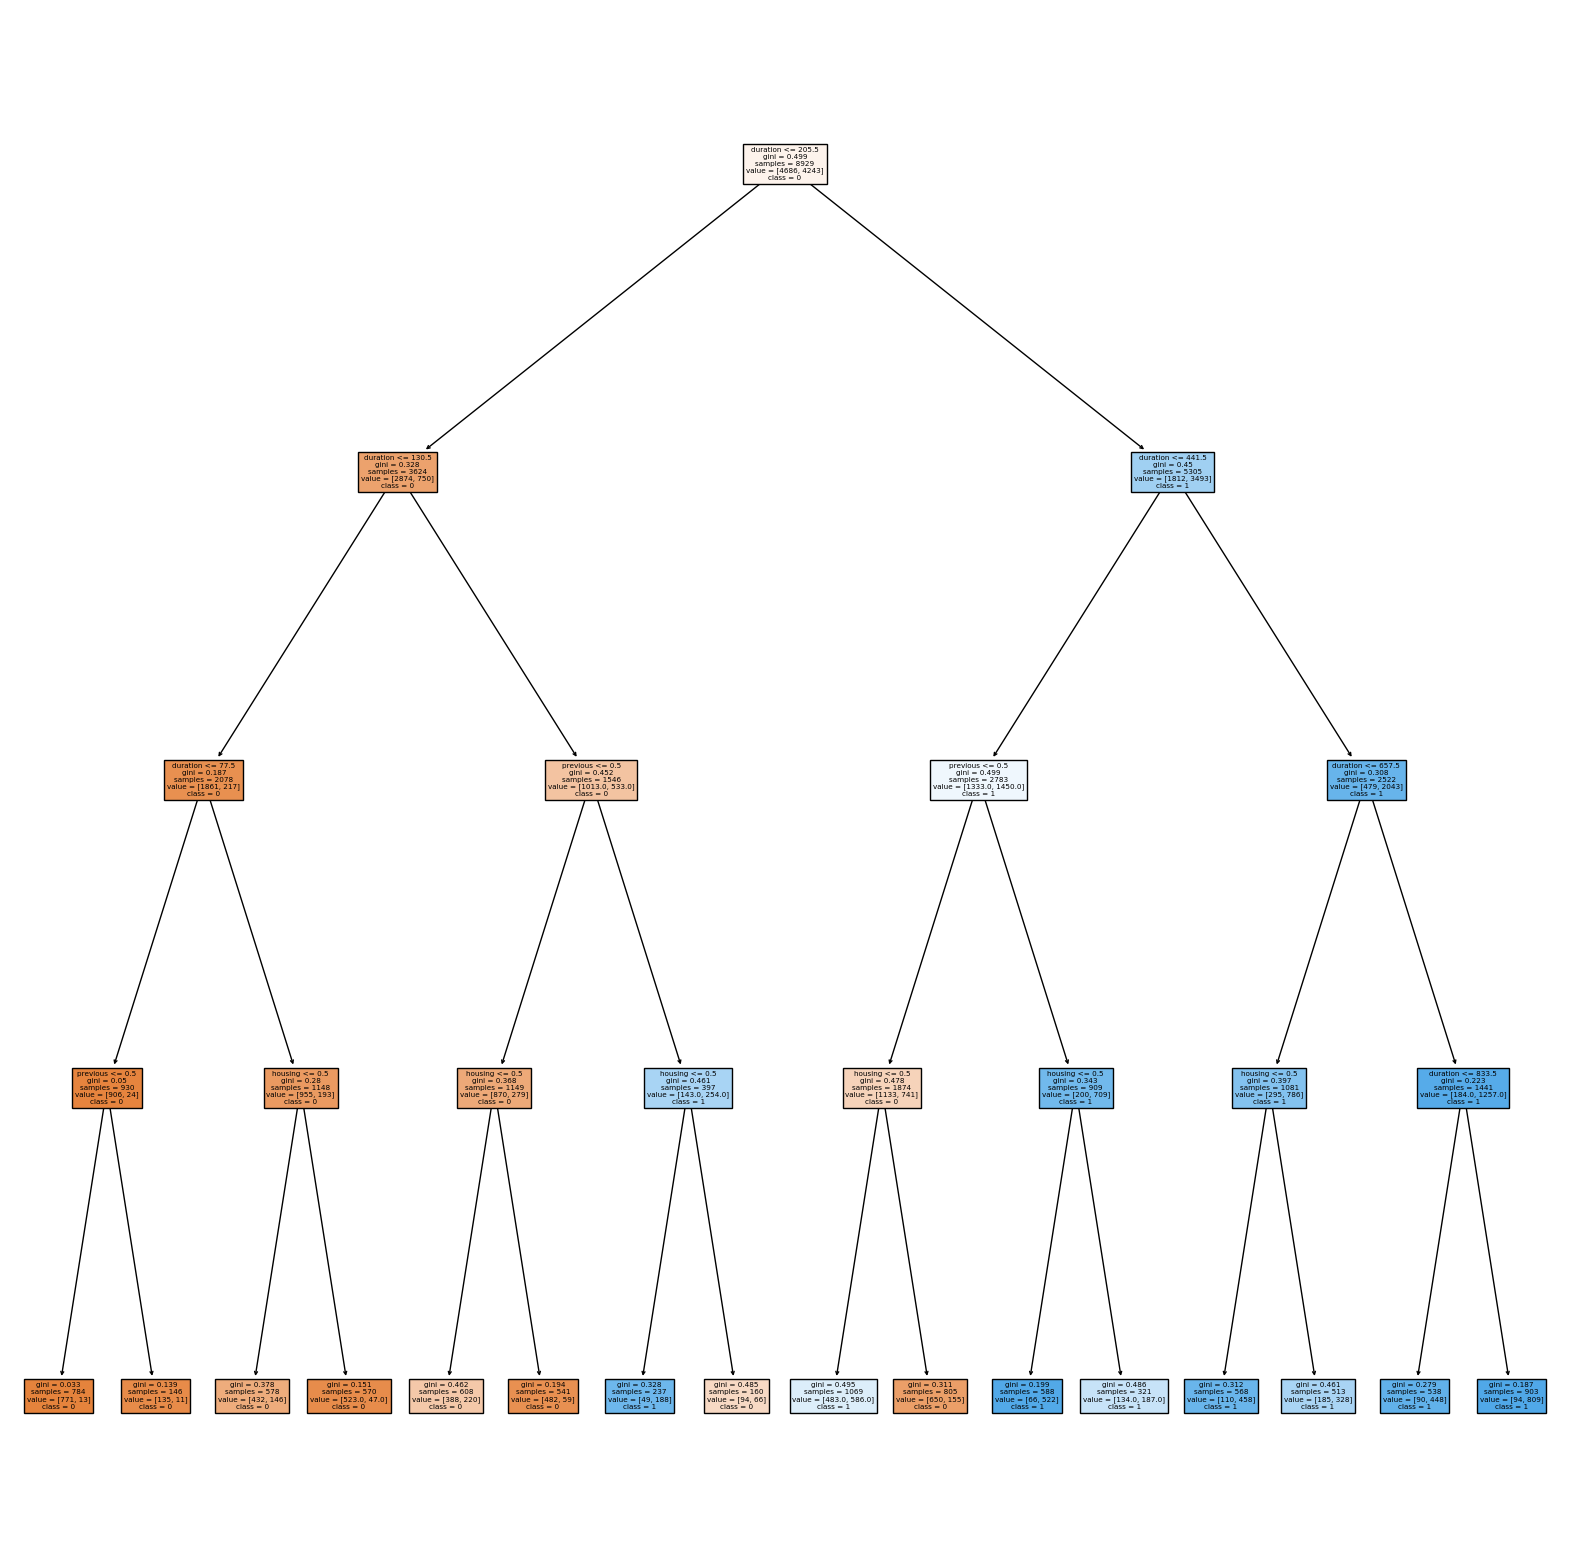

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(model2, filled=True, feature_names=xtrain.columns, class_names=['0','1'])

In [23]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plot_tree(model3, filled=True, feature_names=xtrain.columns, class_names=['0','1'])

# Hyperparameter Tunning

In [24]:
dt = DecisionTreeClassifier()

### Grid Search Cross Validation(CV)

In [25]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[4,6,8],
    'min_sample_leaf':[1,2,3,4,5]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [40]:
start = time.time()
grid_search.fit(xtrain, ytrain)
end = time.time()
print('Time taken in random search: {0:.2f}'.format(end-start))

ValueError: Invalid parameter 'min_sample_leaf' for estimator DecisionTreeClassifier(max_depth=4). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].